In [1]:
# Import Modules
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score

In [2]:
# function to load the data
def load_data():
    dataset = load_digits()
    return dataset.data, dataset.target, dataset.images

In [3]:
# function to visualize a single image
def visualize_image(image):
    plt.gray()
    plt.matshow(image)
    plt.show()

In [4]:
# function to train the model
def train_model(X_train, y_train, kernel='linear', gamma=0.001, C=1.0):
    if kernel == 'linear':
        model = svm.SVC(kernel=kernel)
    elif kernel == 'rbf':
        model = svm.SVC(kernel=kernel, gamma=gamma)
    else:
        model = svm.SVC(kernel='rbf', gamma=gamma, C=C)
    model.fit(X_train, y_train)
    return model

In [5]:
# function to predict the label of a single image
def predict_image(model, image):
    result = model.predict(image.reshape(1, -1))
    plt.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    plt.axis('off')
    plt.title('%i' %result)
    plt.show()

In [6]:
# function to evaluate the model on the test set
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Accuracy of the Model: {accuracy * 100:.2f}%")

<Figure size 640x480 with 0 Axes>

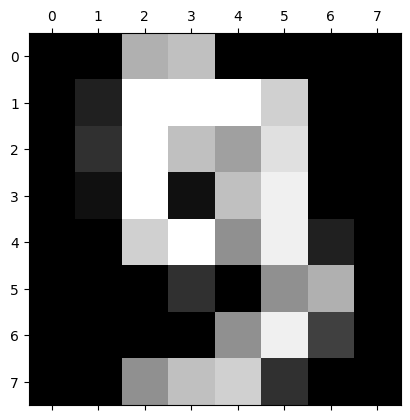

Accuracy of Linear kernel: Accuracy of the Model: 97.11%
Accuracy of Rbf kernel: Accuracy of the Model: 99.56%
Accuracy of Rbf_gamma kernel: Accuracy of the Model: 99.56%
Accuracy of Rbf_gamma_c kernel: Accuracy of the Model: 99.56%
SVC(kernel='linear')


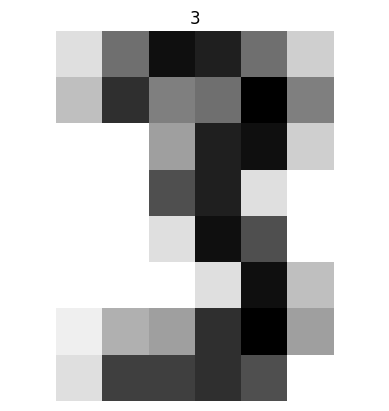

SVC(gamma=0.001)


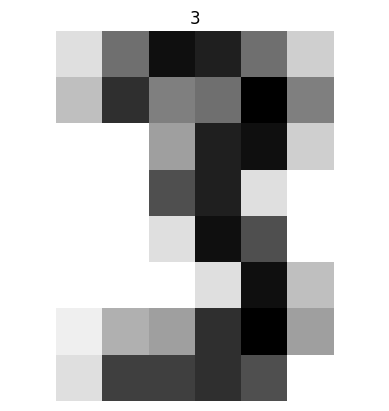

SVC(gamma=0.001)


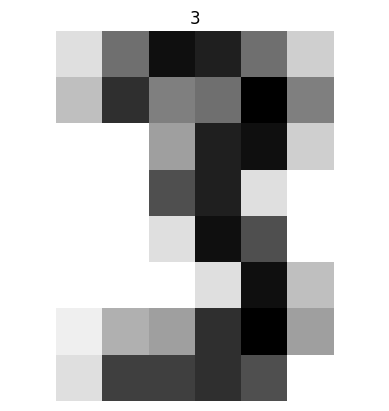

SVC(gamma=0.001)


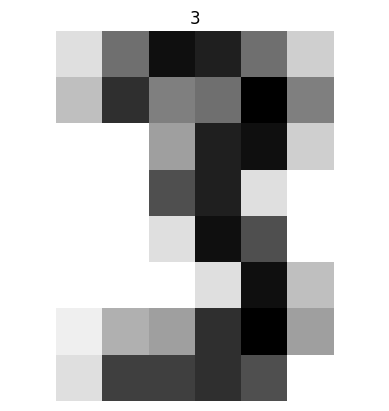

In [14]:
# main function
if __name__ == '__main__':
    # load the data
    X, y, images = load_data()
    n = 9
    # visualize a single image
    visualize_image(images[n])

    # flatten the images to use as features
    X_flat = X.reshape(len(images), -1)
    # split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X_flat, y, test_size=0.25, random_state=0)

    # train models with different kernels
    kernels = ['linear', 'rbf', 'rbf_gamma', 'rbf_gamma_C']
    models = [train_model(X_train, y_train, kernel=k) for k in kernels]

    # evaluate the models on the test set
    for kernel, model in zip(kernels, models):
        print(f"Accuracy of {kernel.capitalize()} kernel: ", end="")
        evaluate_model(model, X_test, y_test)

    # predict the label of a single image with each model
    n = 13
    for model in models:
        print(model)
        predict_image(model, images[n])